<a href="https://colab.research.google.com/github/eduardoclau/RegressaoLogistica_VendaDeImoveis/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_excel('/BaseDados_RegressaoLogistica.xlsx', 'Plan1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id Cliente     100 non-null    int64
 1   Renda          100 non-null    int64
 2   Tipo Renda     100 non-null    int64
 3   Possui Imóvel  100 non-null    int64
 4   Comprou?       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


In [30]:
df.head(6)

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0
5,6,6903,1,2,1


In [31]:
df.describe()

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
count,100.000000,100.00000,100.000000,100.00000,100.000000
mean,50.500000,8520.77000,1.400000,1.85000,0.640000
std,29.011492,4039.01965,0.710669,0.35887,0.482418
min,1.000000,1643.00000,1.000000,1.00000,0.000000
25%,25.750000,5455.25000,1.000000,2.00000,0.000000
50%,50.500000,8824.00000,1.000000,2.00000,1.000000
75%,75.250000,12036.00000,2.000000,2.00000,1.000000
max,100.000000,14994.00000,3.000000,2.00000,1.000000


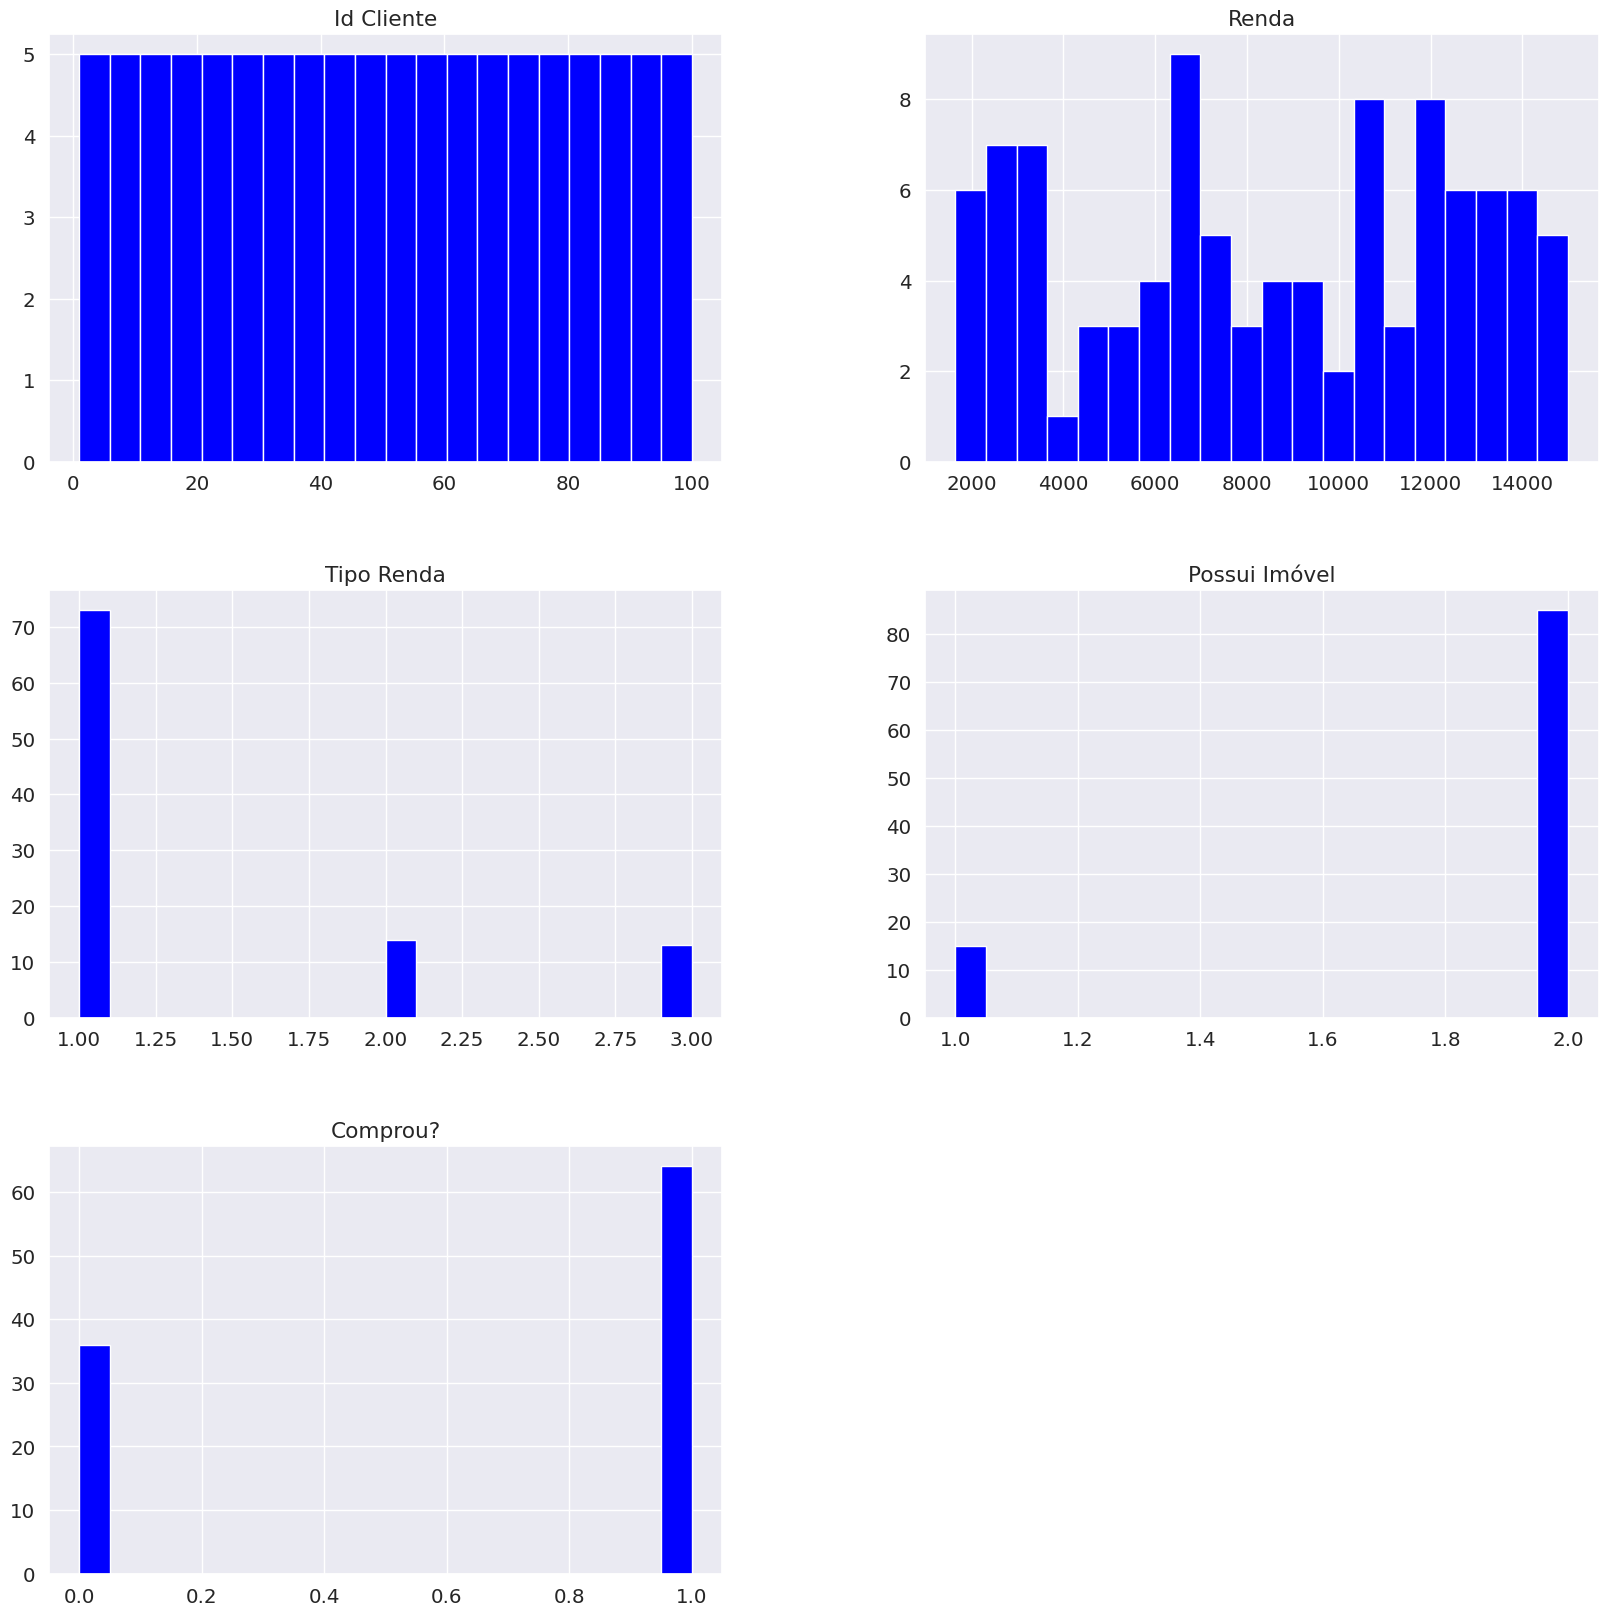

In [32]:
sns.set(font_scale=1.3, rc={'figure.figsize': (20, 20)})

eixo = df.hist(bins=20, color='blue')

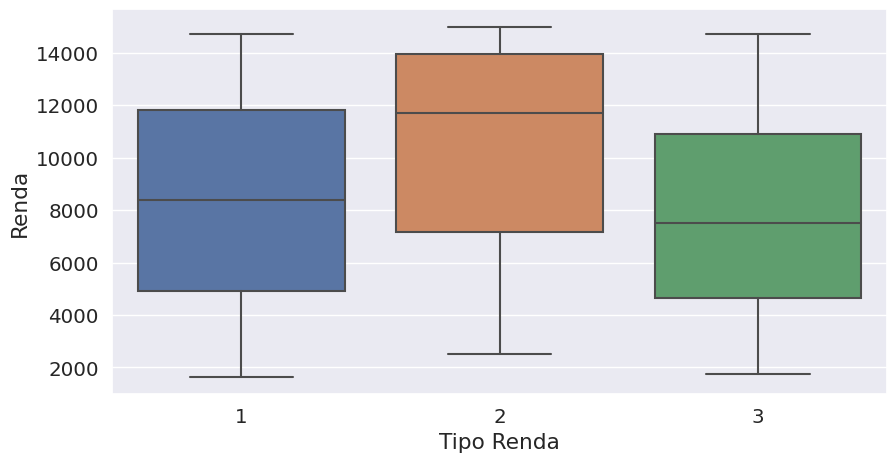

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Tipo Renda', y='Renda');

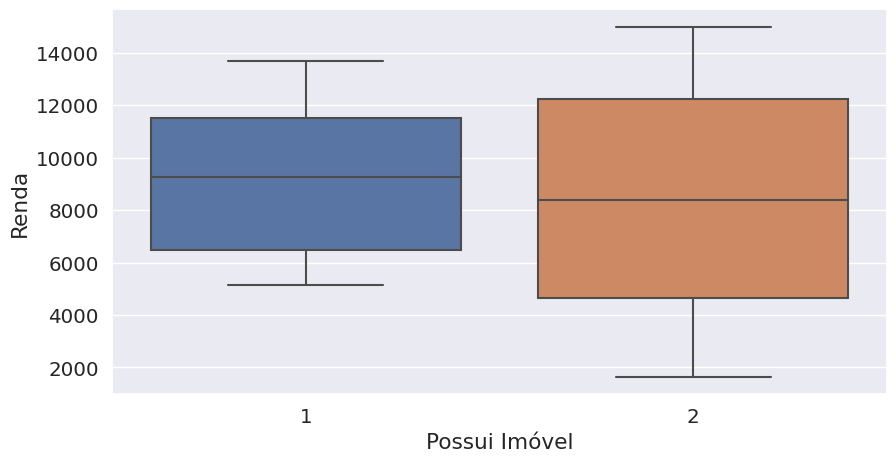

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Possui Imóvel', y='Renda');

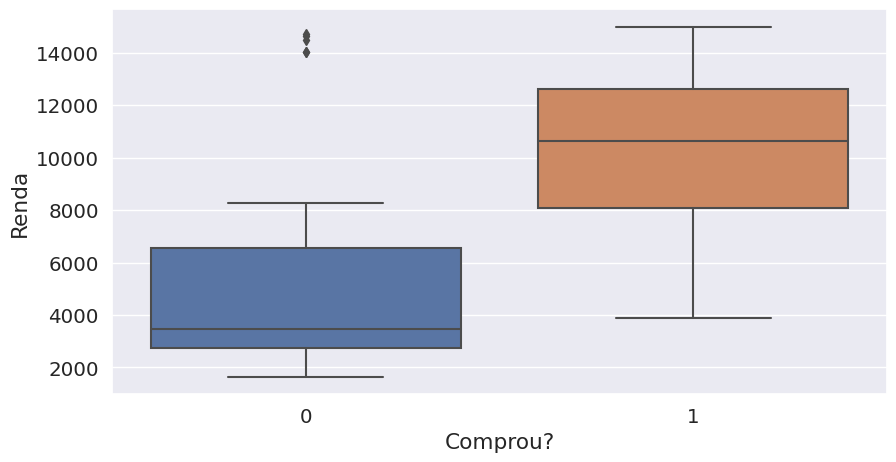

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Comprou?', y='Renda');

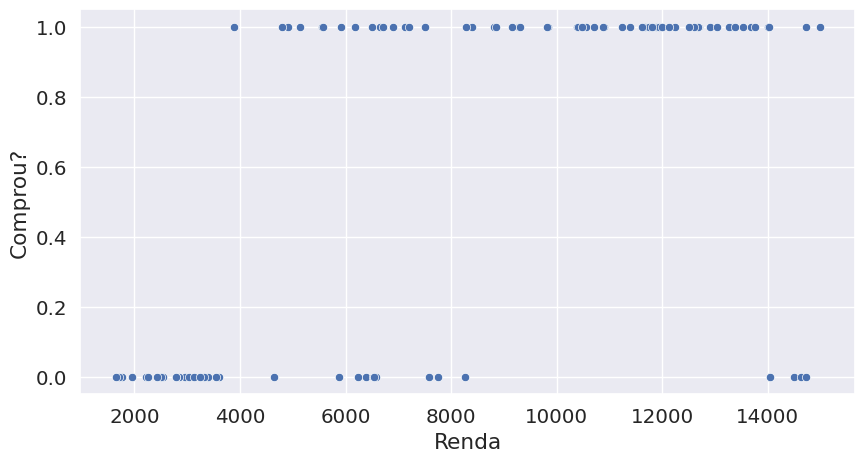

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Renda', y='Comprou?');

In [37]:
caracteristicas = df.iloc[:, 1:4].values
previsor = df.iloc[:, 4:5].values

In [38]:
caracteristicas

array([[10480,     1,     2],
       [ 6182,     2,     2],
       [ 6387,     3,     1],
       [ 6528,     1,     2],
       [ 8269,     1,     2],
       [ 6903,     1,     2],
       [ 1947,     1,     2],
       [14008,     1,     2],
       [ 2213,     1,     2],
       [13321,     2,     2],
       [14043,     3,     2],
       [ 5561,     1,     2],
       [11890,     1,     2],
       [13308,     1,     2],
       [11666,     1,     2],
       [ 3395,     1,     2],
       [ 8854,     2,     2],
       [ 1760,     3,     2],
       [ 7761,     1,     2],
       [ 2952,     1,     2],
       [ 4904,     1,     2],
       [ 2262,     1,     2],
       [13274,     1,     2],
       [ 2546,     1,     2],
       [10393,     2,     2],
       [10901,     3,     2],
       [ 9271,     1,     1],
       [11230,     1,     1],
       [12908,     1,     1],
       [ 6543,     1,     1],
       [11742,     1,     2],
       [ 6578,     2,     2],
       [10555,     3,     1],
       [ 8

In [39]:
previsor

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [40]:
from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_teste = train_test_split(caracteristicas, previsor, test_size=0.25)

In [41]:
from sklearn.linear_model import LogisticRegression

func_logistica = LogisticRegression()

func_logistica.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
previsoes = func_logistica.predict(x_test)

In [43]:
previsoes

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1])

In [44]:
y_teste

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix (y_teste, previsoes)

array([[ 9,  4],
       [ 0, 12]])

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       0.75      1.00      0.86        12

    accuracy                           0.84        25
   macro avg       0.88      0.85      0.84        25
weighted avg       0.88      0.84      0.84        25



**Criando interação para uso do modelo**

In [47]:
renda = float(input("Renda bruta mensal do Cliente:"))
Tipo_Renda = int(input("Tipo de renda do cliente: Digite 1 para Salário; Digite 2 para Autônomo; Digite 3 para Empresário"))
possui_imovel = int(input("Cliente já possui um imóvel próprio? Digite 1 para Sim; Digite 2 para Não"))

params = [[renda, Tipo_Renda, possui_imovel]]

previsao = func_logistica.predict(params)

probabilidadeDeCompra = func_logistica.predict_proba(params)

if previsao == 0:
  print ('Não irá comprar!')

else:
  print ('Irá comprar e a probabilidade de compra é de:  ', probabilidadeDeCompra)

Renda bruta mensal do Cliente:15000
Tipo de renda do cliente: Digite 1 para Salário; Digite 2 para Autônomo; Digite 3 para Empresário3
Cliente já possui um imóvel próprio? Digite 1 para Sim; Digite 2 para Não2
Irá comprar e a probabilidade de compra é de:   [[0.10694567 0.89305433]]
